In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

twelve_mos_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').group_by(Measurement.date).all()

twelve_mos_precip_df = pd.DataFrame(twelve_mos_precip, columns=['Date', 'Precipitation'])
twelve_mos_precip_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


C:\Users\dwint\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


<function matplotlib.pyplot.show(*args, **kw)>

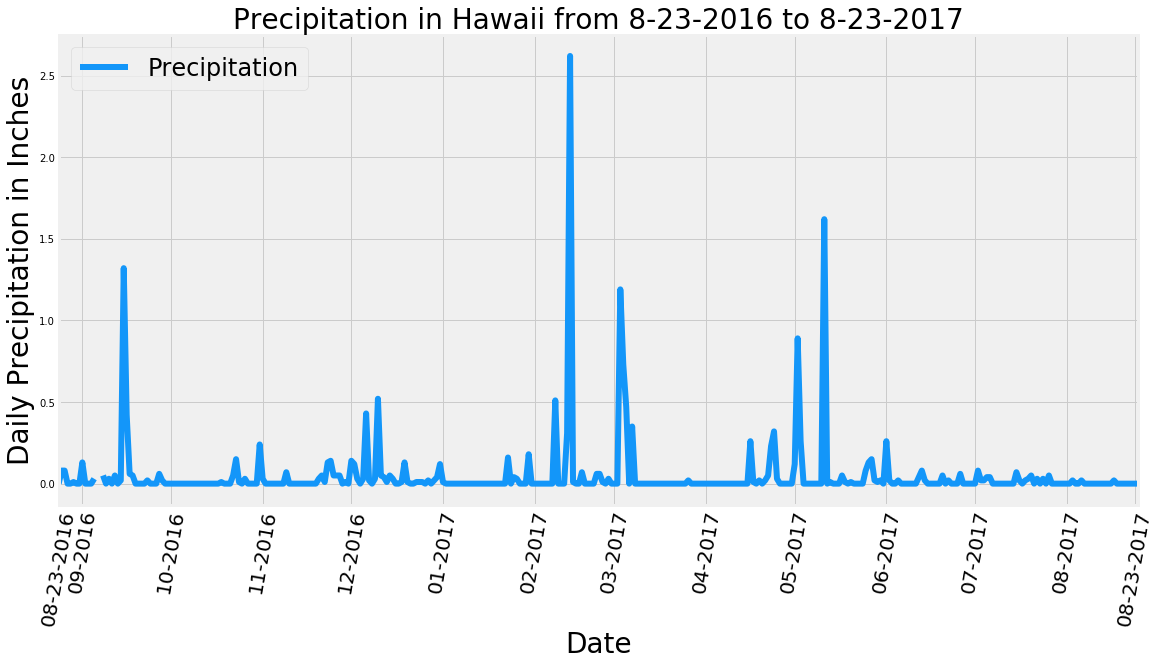

In [11]:
#Plot precipitation data for 12 mos

twelve_mos_precip_df.plot(rot=80, figsize = (16, 8), c = "#1396F9", linewidth=6)

plt.title("Precipitation in Hawaii from 8-23-2016 to 8-23-2017", size =28, color="#000000")
plt.xlabel("Date", size =28, color="#000000")
plt.ylabel("Daily Precipitation in Inches", size =28, color="#000000")
plt.tight_layout()

ax = plt.axes()
x = ['08-23-2016','09-2016', '10-2016', '11-2016', '12-2016', '01-2017',
     '02-2017', '03-2017', '04-2017', '05-2017', '06-2017', '07-2017', 
     '08-2017', '08-23-2017']
l = [0, 8, 38, 69, 99, 130, 161, 188, 219, 249, 280, 310, 341, 364]
ax.set_xticks(l)
ax.set_xticklabels(x, size=20)

plt.legend({"Precipitation":["l","#1396F9"]}, fontsize=24, loc=2)
plt.savefig("precipitation_for_12mos.png")

plt.show

In [12]:
# Calculate the date 1 year ago from the last data point in the database

date_one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Date 1 Year Ago: ", date_one_year_ago)

Date 1 Year Ago:  2016-08-23


In [13]:
# Perform a query to retrieve the date and precipitation scores

date_precip_scores = session.query(Measurement.date, Measurement.prcp)

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

date_precip_scores_df = pd.DataFrame(date_precip_scores, columns=['Date', 'Precipitation'])
date_precip_scores_df.set_index("Date").head(10)


,Precipitation
Date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN
2010-01-07,0.06
2010-01-08,0.00
2010-01-09,0.00
2010-01-10,0.00


In [15]:
# Sort the dataframe by date

date_precip_scores_df.set_index("Date").sort_values(by=["Date"]).head(10)

,Precipitation
Date,
2010-01-01,0.08
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
2010-01-01,0.05
2010-01-01,0.14
2010-01-01,0.28
2010-01-02,0.00
2010-01-02,0.00


C:\Users\dwint\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


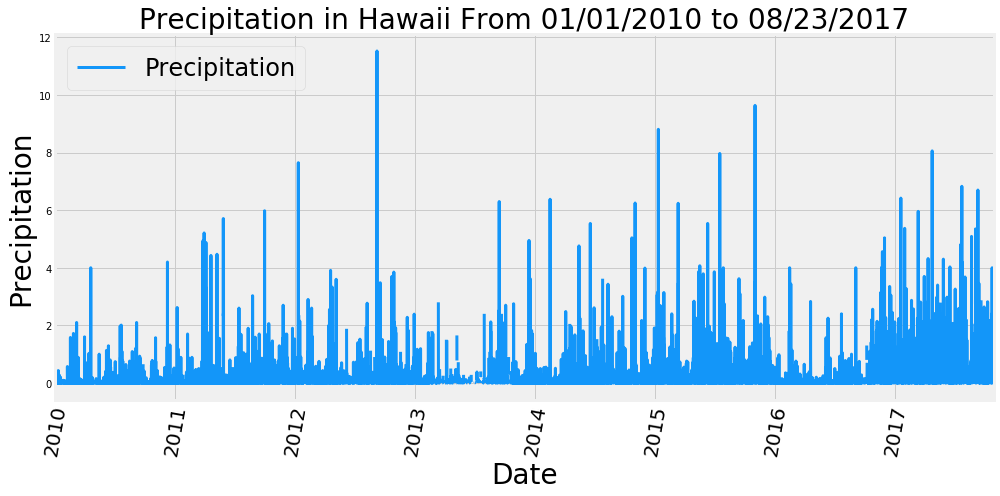

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

date_precip_scores_df.plot(rot=80, figsize = (14, 7), c = "#1396F9", linewidth=3)
plt.title("Precipitation in Hawaii From 01/01/2010 to 08/23/2017", size =28, color="#000000")
plt.xlabel("Date",size =28, color="#000000")
plt.ylabel("Precipitation",size =28, color="#000000")
plt.tight_layout()

ax = plt.axes()
x = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
l = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500]
ax.set_xticks(l)
ax.set_xticklabels(x, size=20)

plt.legend({"Precipitation":["l","#1396F9"]}, fontsize=24, loc=2)
plt.tight_layout()
plt.savefig("precipitation_for_92mos.png")
plt.show()


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data

date_precip_scores_df.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [18]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Station.name).count()
print("Hawaii has {} precipitation recording stations.".format(station_count))


Hawaii has 9 precipitation recording stations.


In [19]:
# Formula fashioned after code by shargr2 @ https://github.com/shargr2/sqlalchemy-challenge/blob/master/climate_starter.ipynb
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations_ranked_by_activity = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()

print("Hawaiian Stations Ranked by Activity:")
stations_ranked_by_activity

Hawaiian Stations Ranked by Activity:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281").all()

most_active_station

[(54.0, 85.0, 71.66378066378067)]

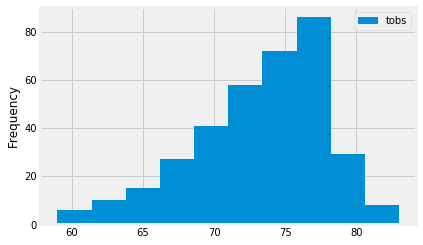

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station_temps_12mos = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.date >= '2016-08-23')

most_active_station_temps_12mos_df = pd.DataFrame(most_active_station_temps_12mos, columns=['tobs'])

most_active_station_temps_12mos_df.plot.hist()

plt.savefig("station_temps_12mos.png")


In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
temps_data = []
temps_data = calc_temps('2012-02-28', '2012-03-05')
print(temps_data)

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
        
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

temps_data = []  
temps_data = calc_temps('2011-02-28', '2011-03-05')
print(temps_data)

[(61.0, 69.75510204081633, 75.0)]


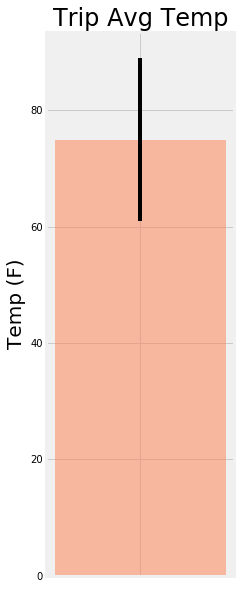

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(3,10))
plt.bar(1, temps_data[0][2], yerr=(temps_data[0][2] - temps_data[0][0]), tick_label='', color='coral', alpha=0.5)
plt.ylabel("Temp (F)", size=20)
plt.title("Trip Avg Temp", size=24)
plt.savefig("trip_avg_trip.png")
plt.show()

In [54]:
# Formula fashioned after code by cemoga @ https://github.com/cemoga/sqlalchemy-challenge/blob/master/climate_starter.ipynb
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_station_rainfall = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).\
        filter(Measurement.station == Station.station).\
        group_by(Measurement.station).\
        order_by(func.sum(Measurement.prcp).desc()).all()

total_station_rainfall


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.14),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.15),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.28),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.15),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.01),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.08),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.05),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  0.21),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

## Optional Challenge Assignment

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [29]:
# Plot the daily normals as an area plot with `stacked=False`
